Code to calculate permafrost area under four climate change scenarios using output from UKESM1 model. Things still to do:
- mask out Greenland ice sheet
- sort filenames

In [2]:
#load packages
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import cartopy
import cartopy.crs as ccrs
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy.ma as ma

import os
import matplotlib.colors as colors
import matplotlib.path as mpath
import matplotlib.patches as mpatches

import scipy
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [2]:
#calculate land area for each cell

fn1 = 'CM_data/areacella_fx_UKESM1-0-LL_piControl_r1i1p1f2_gn.nc'
areacell = xr.open_dataset(fn1)
fn2 = 'CM_data/sftlf_fx_UKESM1-0-LL_piControl_r1i1p1f2_gn.nc'
lndfrac = xr.open_dataset(fn2)

acl = areacell['areacella'].values
lfr = lndfrac['sftlf'].values
lp = lfr/100
lndarea = np.multiply(acl,lp)

#define lat and long
lat = areacell['lat']
lon = areacell['lon']

In [49]:
#load all of the files

def load_data(info):
    '''function to load data for variable and scenario
    Arguments:
    =========
    info = array of str, ccontaining variable[0], letter[1], senario[2]'''
    path = f'CM_data/{info[0]}_{info[1]}mon_UKESM1-0-LL_{info[2]}_r1i1p1f2_gn_*.nc'
    data = xr.open_mfdataset(paths=path,combine='nested',concat_dim='time')
    return data

def tsl_tslice(info,startdate,enddate,depth):
    ds = load_data(info)
    ds1 = ds.sel(time=slice(startdate,enddate))
    ds2 = ds1['tsl']
    ds_tsl_2K = ds2.sel(depth = depth, method='nearest')
    ds_tsl2 = ds_tsl_2K-273.15
    ds_tsl2_mean = ds_tsl2.mean(dim='time')
    return ds_tsl2_mean

info = np.array(['tsl','L','historical'])
startdate = '1850-01-01'
enddate = '1900-12-16'
depth = 2.0

test = tsl_tslice(info,startdate,enddate,depth)

#test1 = load_data(info)


#tsl_historical = load_data('tsl','L','historical')
#tsl_126  = load_data('tsl','L','ssp126')
#tsl_245  = load_data('tsl','L','ssp245')
#tsl_126  = load_data('tsl','L','ssp126')
#tsl_126  = load_data('tsl','L','ssp126')


In [58]:
test1 = load_data(info)
test2 = test1.sel(time=slice(startdate,enddate))
test3 = test2['tsl'].sel(depth=depth)
fha = 'CM_data/tsl_Lmon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'
fhb = 'CM_data/tsl_Lmon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc'
td = xr.open_dataset(fha)
td1 = td['tsl'].sel(depth=depth)
td2 = td1.mean(dim='time')
test1


C:\Users\lcawh\Anaconda3\envs\new_geog0111\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.Dataset>
Dimensions:     (bnds: 2, depth: 4, lat: 144, lon: 192, time: 1980)
Coordinates:
  * lat         (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon         (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
  * depth       (depth) float64 0.05 0.225 0.675 2.0
  * time        (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (time, bnds) object dask.array<chunksize=(1200, 2), meta=np.ndarray>
    depth_bnds  (time, depth, bnds) float64 dask.array<chunksize=(1200, 4, 2), meta=np.ndarray>
    lat_bnds    (time, lat, bnds) float64 dask.array<chunksize=(1200, 144, 2), meta=np.ndarray>
    lon_bnds    (time, lon, bnds) float64 dask.array<chunksize=(1200, 192, 2), meta=np.ndarray>
    tsl         (time, depth, lat, lon) float32 dask.array<chunksize=(1200, 4, 144, 192), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  144000.0
    creation_date:          2019-04-05T15:55:00Z
    cv_version:             6.2.20.1
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          2
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.MOHC.UKESM1-...
    grid:                   Native N96 grid; 192 x 144 longitude/latitude
    grid_label:             gn
    history:                2019-04-05T15:50:03Z ; CMOR rewrote data to be co...
    initialization_index:   1
    institution:            Met Office Hadley Centre, Fitzroy Road, Exeter, D...
    institution_id:         MOHC
    mip_era:                CMIP6
    mo_runid:               u-bc179
    nominal_resolution:     250 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       UKESM1-0-LL
    parent_time_units:      days since 1850-01-01-00-00-00
    parent_variant_label:   r1i1p1f2
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  land
    source:                 UKESM1.0-LL (2018): \naerosol: UKCA-GLOMAP-mode\n...
    source_id:              UKESM1-0-LL
    source_type:            AOGCM AER BGC CHEM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Lmon
    table_info:             Creation Date:(13 December 2018) MD5:2b12b5db6db1...
    title:                  UKESM1-0-LL output prepared for CMIP6
    variable_id:            tsl
    variant_label:          r1i1p1f2
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/9d496119-74ea-4c8d-9180-c93e48ea9773

In [35]:
def soil_mask(name):
    '''Generates mask of area where mean annual soil temp < 0 C i.e. pf present'''
    mask = name
    mask = xr.where(mask>=0,np.nan,mask)
    mask = xr.where(mask<0,1,mask)
    return mask

tsl_hist = soil_mask(test)
print(tsl_hist.min)

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray 'tsl' (lat: 144, lon: 192)>
dask.array<where, shape=(144, 192), dtype=float32, chunksize=(144, 192), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1
    depth    float64 2.0>


In [3]:
#got to find a better way of generating variable names
#get function to concatenate historical series and then load as function

fha = 'CM_data/tsl_Lmon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'
fhb = 'CM_data/tsl_Lmon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc'
f126a = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp126_r1i1p1f2_gn_201501-204912.nc'
f126b = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp126_r1i1p1f2_gn_205001-210012.nc'
f245a = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp245_r1i1p1f2_gn_201501-204912.nc'
f245b = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp245_r1i1p1f2_gn_205001-210012.nc'
f370a = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_201501-204912.nc'
f370b = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_205001-210012.nc'
f585a = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_201501-204912.nc'
f585b = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_205001-210012.nc'

satha = 'CM_data/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'
sath = 'CM_data/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc'
sat126 = 'CM_data/tas_Amon_UKESM1-0-LL_ssp126_r1i1p1f2_gn_205001-210012.nc'
sat245 = 'CM_data/tas_Amon_UKESM1-0-LL_ssp245_r1i1p1f2_gn_205001-210012.nc'
sat370 = 'CM_data/tas_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_205001-210012.nc'
sat585 = 'CM_data/tas_Amon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_205001-210012.nc'

csoilhist = 'CM_data/cSoil_Emon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc'
csoil126 = 'CM_data/cSoil_Emon_UKESM1-0-LL_ssp126_r1i1p1f2_gn_205001-210012.nc'
csoil245 = 'CM_data/cSoil_Emon_UKESM1-0-LL_ssp245_r1i1p1f2_gn_205001-210012.nc'
csoil370 = 'CM_data/cSoil_Emon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_205001-210012.nc'
csoil585 = 'CM_data/cSoil_Emon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_205001-210012.nc'

In [4]:
#get timeslice for baseline (1850-1900) and comparion (2090-2100) period

def tsl_slice(fname,depth,startdate,enddate):
    ds = xr.open_dataset(fname)
    ds1 = ds.sel(time=slice(startdate,enddate))
    ds2 = ds1['tsl']
    ds_tsl_2K = ds2.sel(depth = depth, method='nearest')
    ds_tsl2 = ds_tsl_2K-273.15
    ds_tsl2_mean = ds_tsl2.mean(dim='time')
    return ds_tsl2_mean

#################
# TEST FUNCTION #
#################

blpf = tsl_slice(fha,2.0,'1850-01-01','1900-12-16')
s126tsl = tsl_slice(f126b,2.0,'2090-01-01','2100-12-16')
s245tsl = tsl_slice(f245b,2.0,'2090-01-01','2100-12-16')
s370tsl = tsl_slice(f370b,2.0,'2090-01-01','2100-12-16')
s585tsl = tsl_slice(f585b,2.0,'2090-01-01','2100-12-16')

C:\Users\lcawh\Anaconda3\envs\new_geog0111\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [5]:
def sat_slice(fname,startdate,enddate):
    '''Returns mean temp in C of time slice (start and enddate) for given filename'''
    ds = xr.open_dataset(fname)
    ds1 = ds.sel(time=slice(startdate,enddate))
    ds2 = ds1['tas']
    ds3 = ds2-273.15
    ds4 = ds3.mean(dim='time')
    return ds4

#################
# TEST FUNCTION #
#################

blsat = sat_slice(satha,'1850-01-01','1900-12-16')
s126sat = sat_slice(sat126,'2090-01-01','2100-12-16')
s245sat = sat_slice(sat245,'2090-01-01','2100-12-16')
s370sat = sat_slice(sat370,'2090-01-01','2100-12-16')
s585sat = sat_slice(sat585,'2090-01-01','2100-12-16')

In [6]:
#generate masks for each variable of itnerest

def soil_mask(name):
    '''Generates mask of area where mean annual soil temp < 0 C i.e. pf present'''
    mask = name
    mask = xr.where(mask>=0,np.nan,mask)
    mask = xr.where(mask<0,1,mask)
    return mask

def tas_mask1(name):
    '''Generates mask of area where mean annual air temp < 0 C'''
    mask = name
    mask = xr.where(mask>0,np.nan,mask)
    mask = xr.where(mask<=0,1,mask)
    return mask

def tas_mask2(name):
    '''Generates mask of area where mean annual air temp < -4.3 C'''
    mask = name
    mask = xr.where(mask>-4.3,np.nan,mask)
    mask = xr.where(mask<=-4.3,1,mask)
    return mask

def oceanmask(name):
    '''Generates mask of ocean cells'''
    mask = name.fillna(100)
    mask = xr.where(mask<50,np.nan,mask)
    mask = mask.to_masked_array()
    return mask

pfhist = soil_mask(blpf)
tashist = tas_mask1(blsat)
tashista = tas_mask2(blsat)
ocean = oceanmask(blpf)

pf126 = soil_mask(s126tsl)
pf245 = soil_mask(s245tsl)
pf370 = soil_mask(s370tsl)
pf585  = soil_mask(s585tsl)

tas126 = tas_mask1(s126sat)
tas245 = tas_mask1(s245sat)
tas370 = tas_mask1(s370sat)
tas585 = tas_mask1(s585sat)

tas126a = tas_mask2(s126sat)
tas245a = tas_mask2(s245sat)
tas370a = tas_mask2(s370sat)
tas585a = tas_mask2(s585sat)

In [10]:
def get_tsl_2C(fname):
    '''Gets the soil temp in C at a depth of 2 m'''
    ds = xr.open_dataset(fname)
    ds1 = ds['tsl']
    ds_tsl_2K = ds1.sel(depth = 2.0)
    ds_tsl2 = ds_tsl_2K-273.15
    return ds_tsl2

fha = 'CM_data/tsl_Lmon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'
fhb = 'CM_data/tsl_Lmon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc'
hista = get_tsl_2C(fha)
histb = get_tsl_2C(fhb)
hist = xr.concat([hista,histb],dim='time')

In [11]:
#gets baseline aera of pf
test = hist.sel(time=slice('1850-01-01','1900-12-16'))
ds4 = test.mean(dim='time')
        
mask = ds4
mask = xr.where(mask>=0,np.nan,mask)
mask = xr.where(mask<0,1,mask)
d5 = np.multiply(mask,lndarea)
d6 = (np.nansum(d5))/1000000

clim=d6

C:\Users\lcawh\Anaconda3\envs\new_geog0111\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [12]:
def pf_series(dataset,startyear,endyear):
    
    years = np.unique(dataset['time.year'])
    
    pf_series = np.zeros(years.shape)
    sz = range(len(years))


    for x, s in zip(years, sz):
        ds = dataset
        ds3 = ds.sel(time=slice(f'{x}-01-01',f'{x+1}-12-16'))
        ds4 = ds3.mean(dim='time')
        mask = ds4
        mask = xr.where(mask>=0,np.nan,mask)
        mask = xr.where(mask<0,1,mask)
        d5 = np.multiply(mask,lndarea)
        d6 = np.nansum(d5)
        pf_series[s]=d6/1000000

    return pf_series

########
# TEST #
########

z = pf_series(hist, 1850, 2014)

In [13]:
f126a = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp126_r1i1p1f2_gn_201501-204912.nc'
f126b = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp126_r1i1p1f2_gn_205001-210012.nc'
f245a = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp245_r1i1p1f2_gn_201501-204912.nc'
f245b = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp245_r1i1p1f2_gn_205001-210012.nc'
f370a = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_201501-204912.nc'
f370b = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_205001-210012.nc'
f585a = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_201501-204912.nc'
f585b = 'CM_data/tsl_Lmon_UKESM1-0-LL_ssp585_r1i1p1f2_gn_205001-210012.nc'
s126a = get_tsl_2C(f126a)
s126b = get_tsl_2C(f126b)
s245a = get_tsl_2C(f245a)
s245b = get_tsl_2C(f245b)
s370a = get_tsl_2C(f370a)
s370b = get_tsl_2C(f370b)
s585a = get_tsl_2C(f585a)
s585b = get_tsl_2C(f585b)

ssp126 = xr.concat([s126a,s126b],dim='time')
ssp245 = xr.concat([s245a,s245b],dim='time')
ssp370 = xr.concat([s370a,s370b],dim='time')
ssp585 = xr.concat([s585a,s585b],dim='time')
s1 = pf_series(ssp126,2015,2100)
s2 = pf_series(ssp245,2015,2100)
s3 = pf_series(ssp370,2015,2100)
s5 = pf_series(ssp585,2015,2100)

C:\Users\lcawh\Anaconda3\envs\new_geog0111\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [14]:
#need to come up with a better way of briding the series, this is messy
bridge1a = histb.sel(time=slice('2012-01-01','2014-12-16'))
bridge1b = s126a.sel(time=slice('2015-01-01','2016-12-16'))
bridge2b = s245a.sel(time=slice('2015-01-01','2016-12-16'))
bridge3b = s370a.sel(time=slice('2015-01-01','2016-12-16'))
bridge5b = s585a.sel(time=slice('2015-01-01','2016-12-16'))
bridge1 = xr.concat([bridge1a,bridge1b],dim='time')
bridge2 = xr.concat([bridge1a,bridge2b],dim='time')
bridge3 = xr.concat([bridge1a,bridge3b],dim='time')
bridge5 = xr.concat([bridge1a,bridge5b],dim='time')
b1 = pf_series(bridge1,2012,2017)
b2 = pf_series(bridge2,2012,2017)
b3 = pf_series(bridge3,2012,2017)
b5 = pf_series(bridge5,2012,2017)

C:\Users\lcawh\Anaconda3\envs\new_geog0111\lib\site-packages\xarray\core\nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


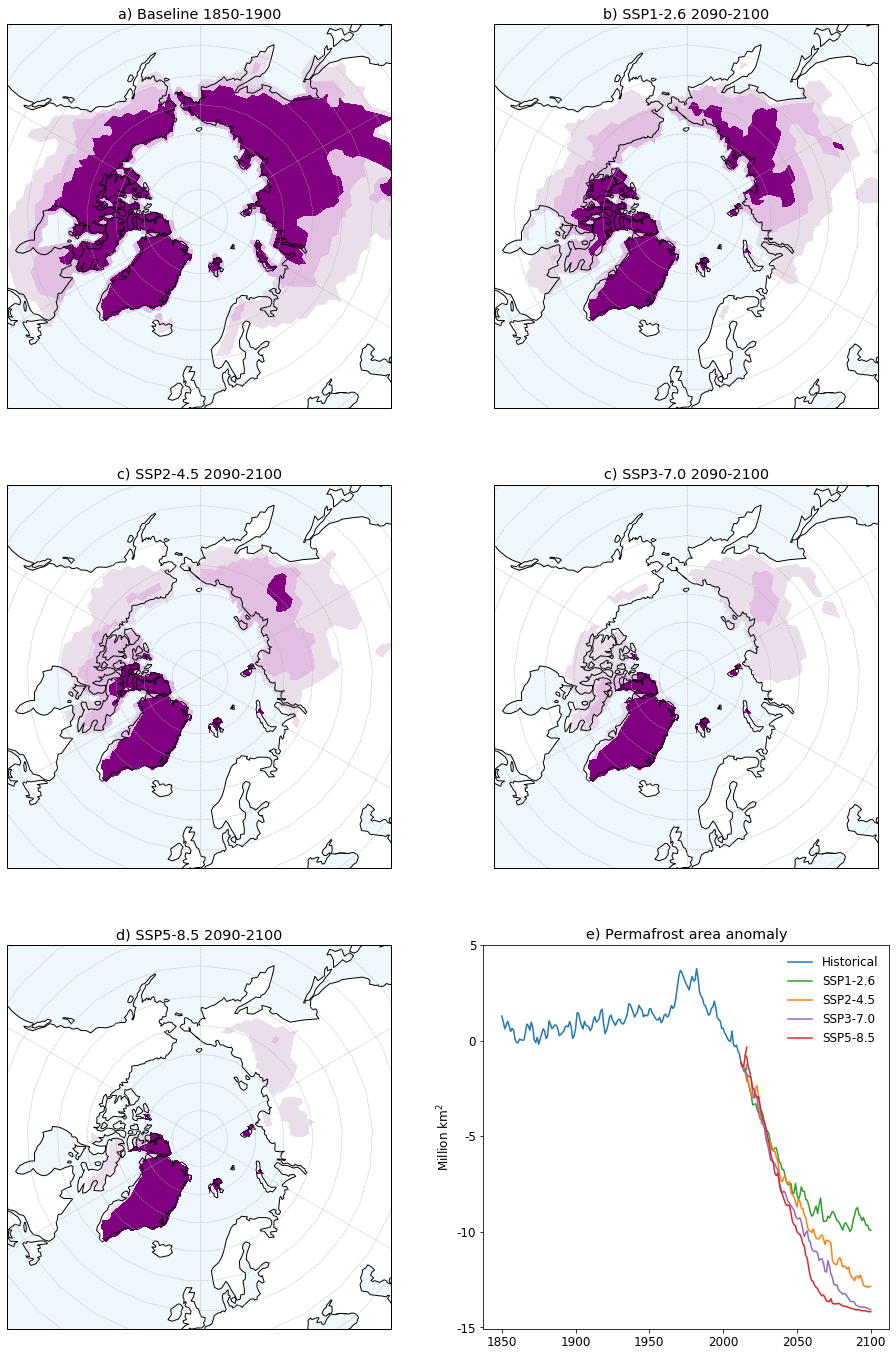

In [19]:
#plot maps and permafrost anomaly for each 

import matplotlib.patches as mpatches
x = range(1850,2015)
y = range(2015,2101)
aa = ([2012,2013,2014,2015,2016])

pf = (pfhist,pf126,pf245,pf370,pf585)
tas1 = (tashist,tas126,tas245,tas370,tas585)
tas2 = (tashista,tas126a,tas245a,tas370a,tas585a)

projection=ccrs.NorthPolarStereo()
transform = ccrs.PlateCarree()
plt.rcParams.update({'font.size': 12})

fig = plt.figure(figsize=(16,24))
ax1 = plt.subplot(3,2,1,projection=ccrs.NorthPolarStereo())
ax2 = plt.subplot(3,2,2,projection=ccrs.NorthPolarStereo())
ax3 = plt.subplot(3,2,3,projection=ccrs.NorthPolarStereo())
ax4 = plt.subplot(3,2,4,projection=ccrs.NorthPolarStereo())
ax5 = plt.subplot(3,2,5,projection=ccrs.NorthPolarStereo())
ax6 = plt.subplot(3,2,6)
ax1.set_title('a) Baseline 1850-1900')
ax2.set_title('b) SSP1-2.6 2090-2100')
ax3.set_title('c) SSP2-4.5 2090-2100')
ax4.set_title('c) SSP3-7.0 2090-2100')
ax5.set_title('d) SSP5-8.5 2090-2100')
ax6.set_title('e) Permafrost area anomaly')

for ax,p,t,b in zip((ax1,ax2,ax3,ax4,ax5),pf,tas1,tas2):  
    ax.set_extent([-180,180,50,90],ccrs.PlateCarree())
    #ax.set_boundary(circle,transform=ax.transAxes)
    ax.gridlines(linewidth=0.5,linestyle='--')
    ax.coastlines()
    ax.add_feature(cartopy.feature.OCEAN,facecolor='aliceblue')
    ax.add_feature(cartopy.feature.LAND, facecolor='white')
    im = ax.contourf(lon,lat,t,transform=transform,colors='thistle',alpha=0.5)
    im = ax.contourf(lon,lat,b,transform=transform,colors='plum',alpha=0.5)
    im = ax.contourf(lon,lat,p,transform=transform, colors='purple')
    im = ax.contourf(lon,lat,ocean,transform=transform, colors='aliceblue')

#plot permafrost anomaly
ax6.plot(x,z-clim,color='#1F77B4',label='Historical')
ax6.plot(aa,b1-clim,color='#2CA02C')
ax6.plot(aa,b2-clim,color='#FF7F0E')
ax6.plot(aa,b3-clim,color='#9467BD')
ax6.plot(aa,b5-clim,color='#D62728')
ax6.plot(y,s1-clim,color='#2CA02C',label='SSP1-2.6')
ax6.plot(y,s2-clim,color='#FF7F0E',label='SSP2-4.5')
ax6.plot(y,s3-clim,color='#9467BD',label='SSP3-7.0')
ax6.plot(y,s5-clim,color='#D62728',label='SSP5-8.5')
ax6.set_yticks([-1.5e7,-1e7,-0.5e7,0,0.5e7])
ax6.set_yticklabels([-15,-10,-5,0,5])
ax6.legend(loc='best',frameon=False)
ax6.set(ylabel='Million km$^2$')
    
    
    
pfarea = mpatches.Rectangle((0, 0), 1, 1, facecolor="purple")
satarea1 = mpatches.Rectangle((0, 0), 1, 1, facecolor="plum")
satarea2 = mpatches.Rectangle((0, 0), 1, 1, facecolor="thistle")
labels = ['Permafrost','Mean annual surface air temperature below -4.3$^\circ$C',
          'Mean annual surface air temperature below 0$^\circ$C']
#plt.legend([pfarea, satarea1,satarea2], labels,loc='lower center', bbox_to_anchor=(-1.2, -0.2, 1., .2),
          #mode="expand", borderaxespad=0.,frameon=False)

#plt.savefig('pf_plots2a')

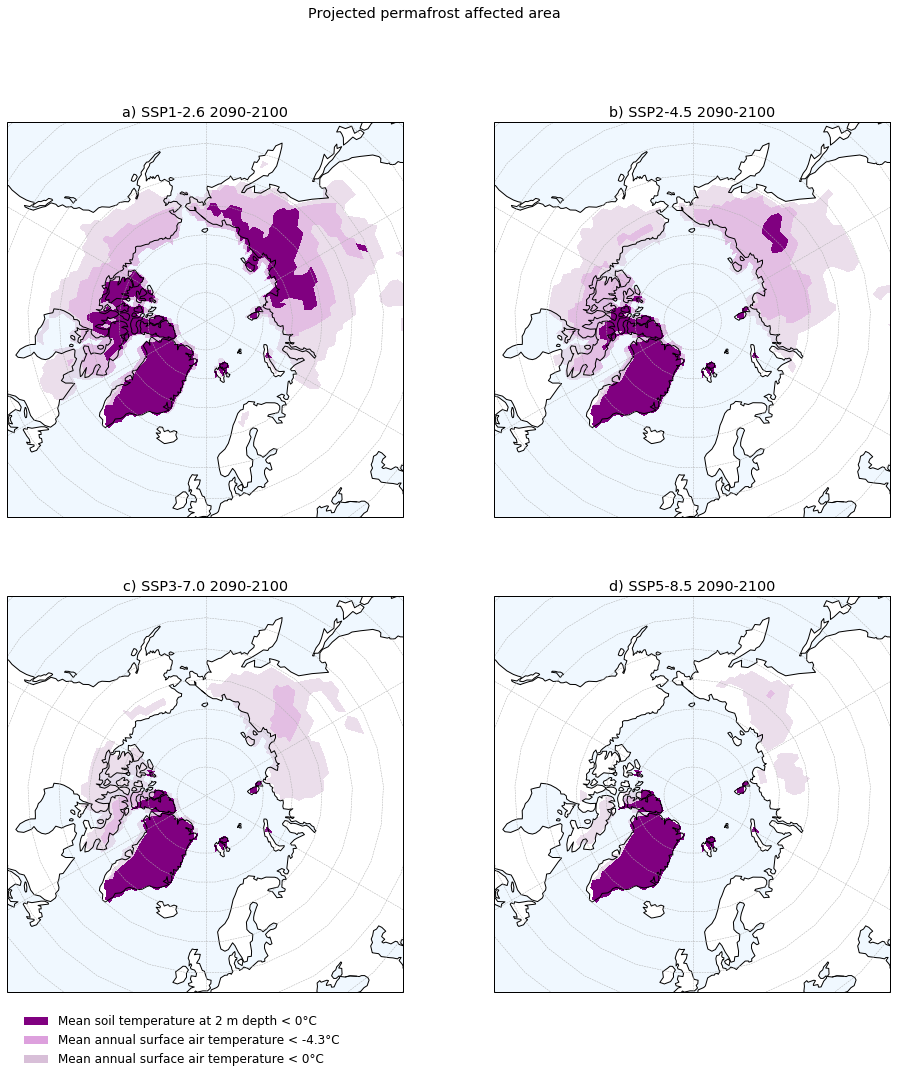

In [9]:
import matplotlib.patches as mpatches

theta = np.linspace(0,2*np.pi,100)
center,radius = [0.5,0.5],0.5
verts = np.vstack([np.sin(theta),np.cos(theta)]).T
circle = mpath.Path(verts*radius+center)

pf = (pf126,pf245,pf370,pf585)
tas1 = (tas126,tas245,tas370,tas585)
tas2 = (tas126a,tas245a,tas370a,tas585a)

projection=ccrs.NorthPolarStereo()
transform = ccrs.PlateCarree()
plt.rcParams.update({'font.size': 12})

fig = plt.figure(figsize=(16,16))
plt.suptitle('Projected permafrost affected area')
ax1 = plt.subplot(2,2,1,projection=ccrs.NorthPolarStereo())
ax2 = plt.subplot(2,2,2,projection=ccrs.NorthPolarStereo())
ax3 = plt.subplot(2,2,3,projection=ccrs.NorthPolarStereo())
ax4 = plt.subplot(2,2,4,projection=ccrs.NorthPolarStereo())


ax1.set_title('a) SSP1-2.6 2090-2100')
ax2.set_title('b) SSP2-4.5 2090-2100')
ax3.set_title('c) SSP3-7.0 2090-2100')
ax4.set_title('d) SSP5-8.5 2090-2100')

for ax,p,t,b in zip((ax1,ax2,ax3,ax4),pf,tas1,tas2):  
    ax.set_extent([-180,180,50,90],ccrs.PlateCarree())
    #ax.set_boundary(circle,transform=ax.transAxes)
    ax.gridlines(linewidth=0.5,linestyle='--')
    ax.coastlines()
    ax.add_feature(cartopy.feature.OCEAN,facecolor='aliceblue')
    ax.add_feature(cartopy.feature.LAND, facecolor='white')
    im = ax.contourf(lon,lat,t,transform=transform,colors='thistle',alpha=0.5)
    im = ax.contourf(lon,lat,b,transform=transform,colors='plum',alpha=0.5)
    im = ax.contourf(lon, lat,p,transform=transform, colors='purple')
    im = ax.contourf(lon,lat,ocean,transform=transform, colors='aliceblue')

pfarea = mpatches.Rectangle((0, 0), 1, 1, facecolor="purple")
satarea1 = mpatches.Rectangle((0, 0), 1, 1, facecolor="plum")
satarea2 = mpatches.Rectangle((0, 0), 1, 1, facecolor="thistle")
labels = ['Mean soil temperature at 2 m depth < 0\u00B0C','Mean annual surface air temperature < -4.3\u00B0C',
          'Mean annual surface air temperature < 0\u00B0C']
plt.legend([pfarea, satarea1,satarea2], labels,loc='lower center', bbox_to_anchor=(-1.2, -0.2, 1., .2),
          mode="expand", borderaxespad=0.,frameon=False)

#plt.savefig('pf_plotsA1')